In [303]:
# PROJECT: Apply Principal Component Analisys (PCA) to Iris dataset for visualization purposes

# ** PCA performance is affected if features are not normalized


In [304]:
# LOAD PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import string

In [305]:
# LOAD DATA

# Get Iris Dataset
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

#print(df_iris.head())

# Get features names
features = iris.feature_names

# Get species names
species = iris.target_names

# Separate the features
x = df_iris.loc[:,features]

# Separate the target
y = pd.DataFrame(iris.target,columns=['species'])

# Standarize the features 
x_std = pd.DataFrame(StandardScaler().fit_transform(x), columns=iris.feature_names)

#print(x.head())
#print(X.head())
#print(y.head())


In [306]:
# PCA PROJECTION TO 2D

# Initialize PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x_std)

df_principal = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

#print(df_principal.head())


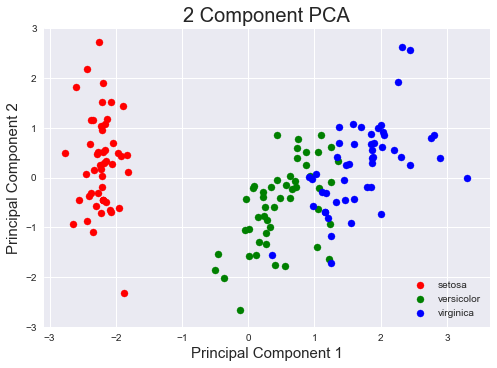

In [307]:
# VISUALIZE 2D PROJECTION

plt.figure
plt.xlabel(string.capwords(df_principal.columns[0]), fontsize=15)
plt.ylabel(string.capwords(df_principal.columns[1]), fontsize=15)
plt.title('2 Component PCA', fontsize=20)

colors = ['r', 'g', 'b']

for target in np.unique(y) :
    plt.scatter(df_principal.loc[y['species'] == target, df_principal.columns[0]],
               df_principal.loc[y['species'] == target, df_principal.columns[1]],
               c=colors[target],
               s=50)

plt.legend(species)
plt.show()


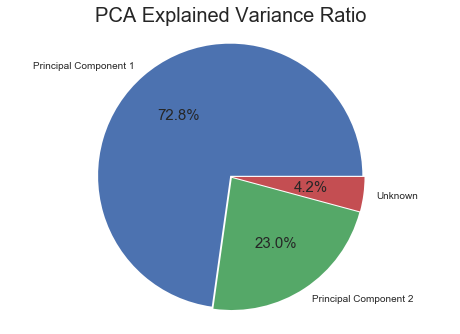

In [308]:
# Show Explained Variance

# Add percentage for uknown variance
explained_variance_ratio = list(pca.explained_variance_ratio_)
explained_variance_ratio.append(1-sum(pca.explained_variance_ratio_))

explained_variance_labels = [string.capwords(item) for item in df_principal.columns]
explained_variance_labels.append('Unknown')

plt.rcParams['font.size'] = 15.0
plt.pie(explained_variance_ratio, 
        explode=[0.01,0.01,0.01],
        labels=explained_variance_labels,
        autopct = '%1.1f%%')
plt.title('PCA Explained Variance Ratio', fontsize=20)
plt.axis('equal')
plt.show()
